# Part II - (Fordgobike Data Explanation)
## by (Nwayalani Uche)

## Investigation Overview
> In this investigation, I wanted to look at features that could influence the duration it takes to complete a ride and the main focus was on features such as distance covered, age, gender and user type. This investigation will look at the individual distribution of variables of interest, after which the relationship between the main variable of interest, duration of ride and other variables of interest is assessed and lastly the relationship between the duration of ride and distanced covered based on gender and user type


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are about 161452 individual rides in the dataset after wrangling with 18 features after about 21,960 data points were removed from the analysis due to inconsistencies, missing information or outliers. Some of the variables in the data includes duration of rides, start station id, name, and geographical coordinates, end station id, name, and geographical coordinates as wells assessed features such as user type, member birth year and member gender. Two new variables distance and age were computed  using the geographical coordinates and member birth year respectively.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike_clean = pd.read_csv('fordgobike_clean.csv')

In [3]:
# Show summary statistics for dataframe
fordgobike_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance,age
count,161452.000000,161452.000000,161452.000000,161452.000000,161452.000000,161452.000000,161452.000000,161452.000000,161452.000000,161452.000000,161452.000000
mean,598.864721,136.983487,37.770676,-122.353039,134.621652,37.770874,-122.352576,4484.975014,1984.858230,1.697315,38.141770
std,394.372478,110.770634,0.099487,0.117006,110.394589,0.099405,0.116568,1660.427395,9.143061,0.970559,9.143061
min,105.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1956.000000,0.013279,25.000000
25%,325.000000,47.000000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,0.948233,31.000000
50%,504.000000,101.000000,37.780526,-122.398285,99.000000,37.780787,-122.397437,4963.000000,1987.000000,1.462301,36.000000
75%,762.000000,230.000000,37.796248,-122.288665,223.000000,37.797280,-122.289415,5509.000000,1992.000000,2.230617,43.000000
max,3174.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,1998.000000,5.045182,67.000000


## Distribution of ride duration 

> Duration of ride in the dataset take on a very large range of values, from about 105 seconds at the lowest, to about 3174 seconds at the highest. Plotting the variable on a log scale shows that it is unimodal and somewhat normally distributed.

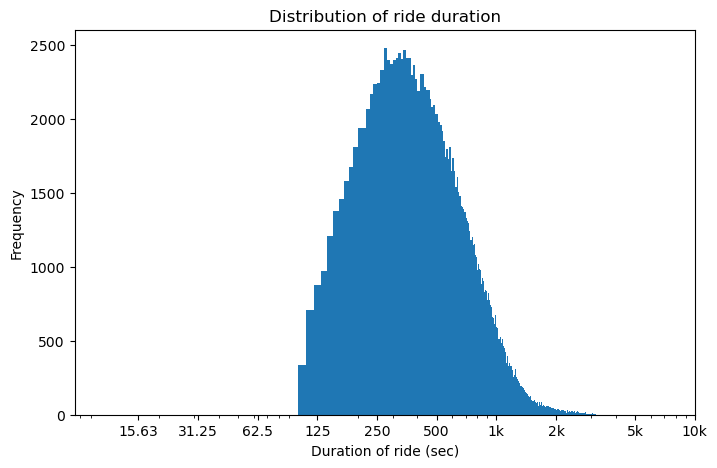

In [4]:
# Plot histogram to show distribution ride duration
binsize = 50
bins = np.arange(0, fordgobike_clean['duration_sec'].max()+binsize, 10)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('Duration of ride (sec)')
plt.ylabel('Frequency')
plt.xticks([15.63,31.25,62.5,125, 250, 500, 1e3, 2e3, 5e3, 1e4], [15.63,31.25,62.5,125,250, 500, '1k', '2k', '5k', '10k'])
plt.title('Distribution of ride duration');

## Distribution of Distance covered by riders

> The distribution of distance covered by the riders in the dataset takes on a range of values between 0.013 and 5.045 and the distribution appears to be normally distributed and unimodal on a log scale.

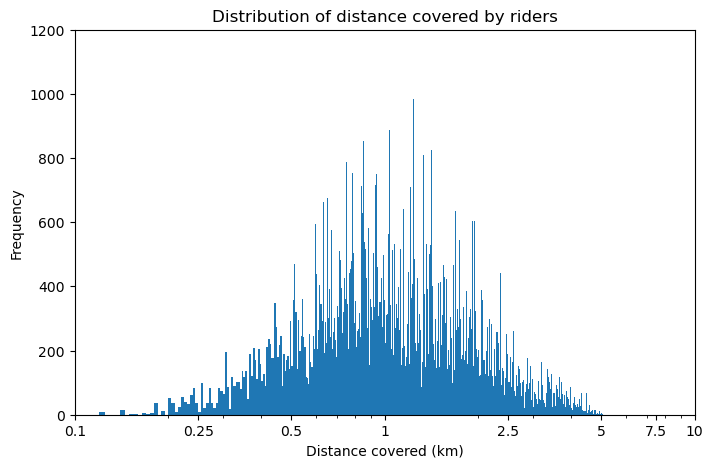

In [5]:
# Plot histogram to show distribution distance covered
binsize = 0.005
bins = np.arange(0, fordgobike_clean['distance'].max()+binsize, 0.005)
plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike_clean, x = 'distance', bins = bins)

plt.xscale('log')
plt.xlim([0.1,10])
plt.ylim([0, 1200])
plt.xticks([0.1, 0.25, 0.5, 1, 2.5, 5, 7.5, 10], [0.1, 0.25, 0.5, 1, 2.5, 5, 7.5, 10])
plt.xlabel('Distance covered (km)')
plt.ylabel('Frequency')
plt.title('Distribution of distance covered by riders');

## Age distribution of riders
> The distribution of age in the data dataset appears to unimodal although it is skewed to the right as majority of the riders where between the ages of about 27 and 40. A log tranformation did not change the pattern of distribution which made it unnecessary.


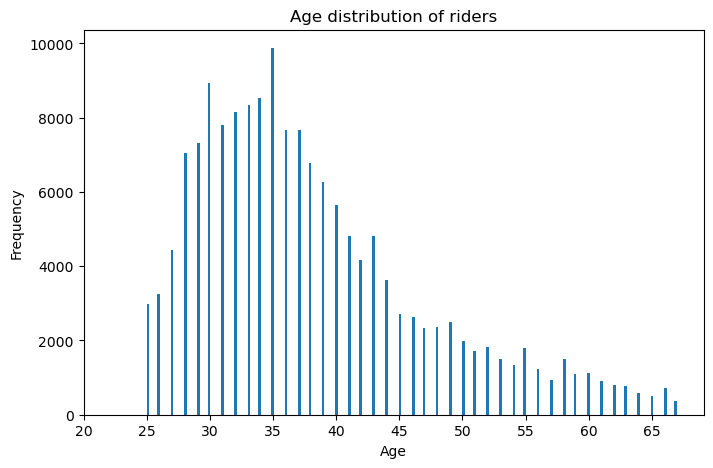

In [6]:
# Plot histogram to show distribution riders age
plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike_clean, x = 'age', bins = 200)
plt.title('Age distribution of riders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(20, 70, 5), np.arange(20, 70, 5));

## Distribution of Gender
> The distribution shows that the majority of the rider were males followed by the female gender and lastly the other gender


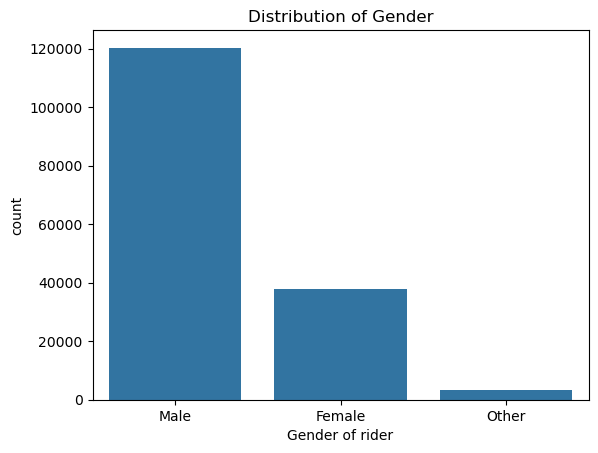

In [7]:
# Plot histogram to show distribution of gender
gender_order = ['Male', 'Female', 'Other']
g_order = CategoricalDtype(gender_order, ordered=True)
fordgobike_clean['member_gender'] = fordgobike_clean['member_gender'].astype(g_order)

default_color = sb.color_palette()[0]
sb.countplot(data = fordgobike_clean, x = 'member_gender', color = default_color)
plt.xlabel('Gender of rider')
plt.title('Distribution of Gender');

## Distribution of user type
> Majority of the users were mostly subcribers while very few were customers

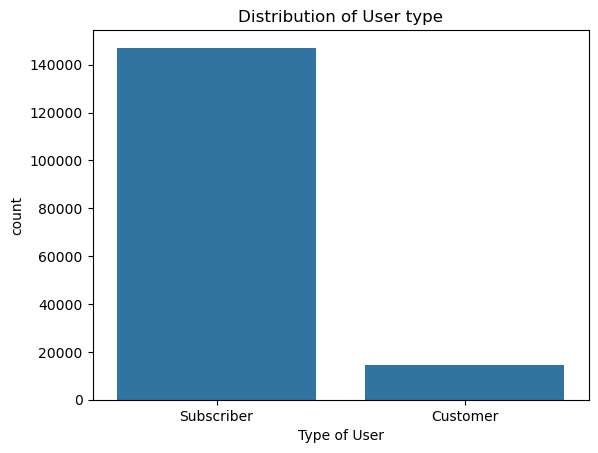

In [8]:
# Plot histogram to show distribution user type
default_color = sb.color_palette()[0]
sb.countplot(data = fordgobike_clean, x = 'user_type', color = default_color)
plt.xlabel('Type of User')
plt.title('Distribution of User type');

## Pairwise correlations between Duration of rides, distance covered and age
> The matrix below shows a positive linear correlation between duration and distance  while the age of the riders doesn't seem to have any significant correlation with duration or distance


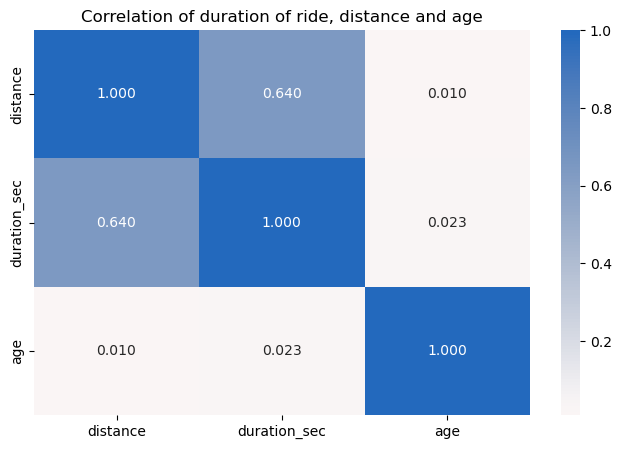

In [15]:
# correlation of numerical variables
plt.figure(figsize = [8, 5])
sb.heatmap(fordgobike_clean[['distance', 'duration_sec', 'age']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation of duration of ride, distance and age');

## Duration of ride VS distance covered
> The positive correlation between duration of ride and distance covered is further confirmed by the scatter plots shown


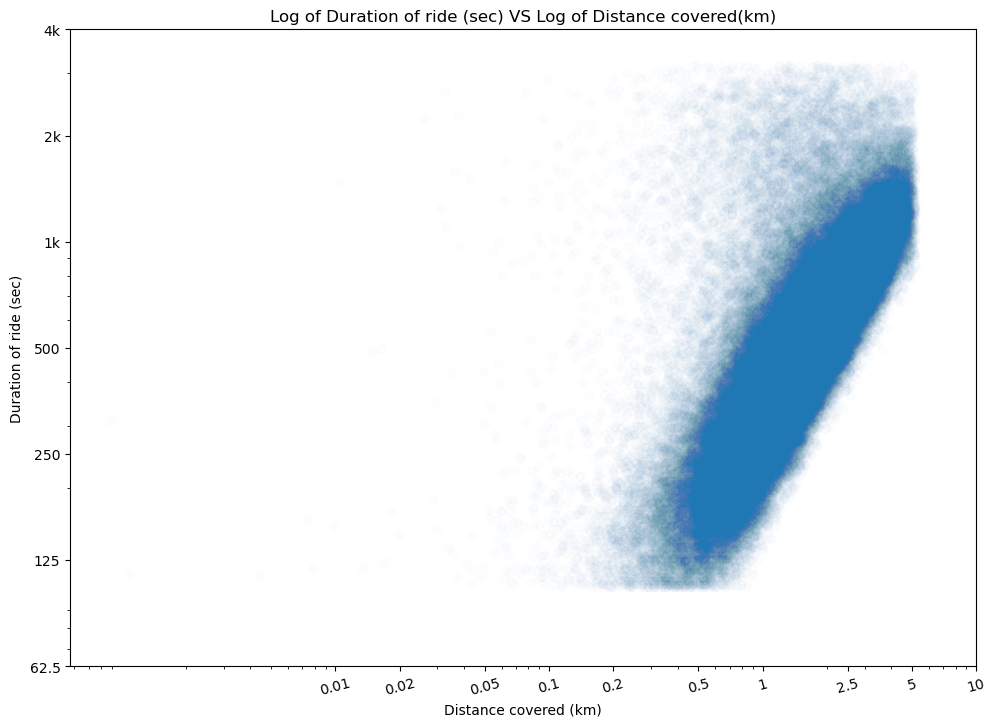

In [18]:
# Bivaraiate analysis of duration and distance
sb.regplot(data = fordgobike_clean, x = 'distance', y = 'duration_sec', fit_reg = False, 
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 0.01})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Distance covered (km)')
plt.ylabel('Duration of ride (sec)')
plt.yticks([62.5, 125, 250, 500, 1000, 2000, 4000], [62.5, 125, 250, 500, '1k', '2k', '4k'])
plt.xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2.5, 5, 10], [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2.5, 5, 10]) 
plt.xticks(rotation = 15)
plt.title('Log of Duration of ride (sec) VS Log of Distance covered(km)');

## Duration of ride VS on gender
> The median duration of ride across the various gender show that the female gender expend more time on bike ride followed by the other gender and males having the least duration

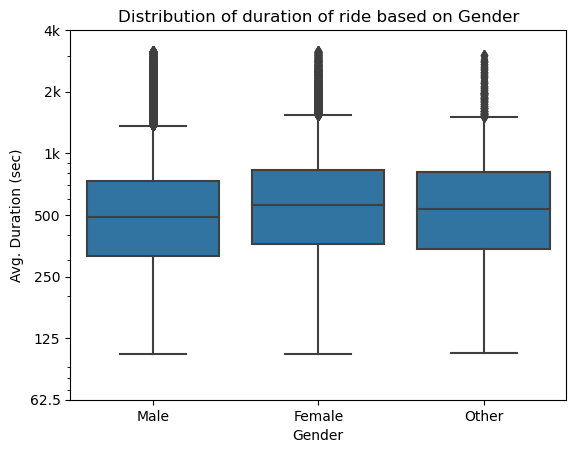

In [11]:
# Bivaraiate analysis of duration and gender
sb.boxplot(data = fordgobike_clean, x = 'member_gender', y = 'duration_sec', color = default_color)
plt.yscale('log')
plt.yticks([62.5, 125, 250, 500, 1000, 2000, 4000], [62.5, 125, 250, 500, '1k', '2k', '4k'])
plt.ylabel('Avg. Duration (sec)')
plt.xlabel('Gender')
plt.title('Distribution of duration of ride based on Gender');

## Duration of ride VS user type
> The median duration of rides based on the user types shows that customers had a higher duration of ride when compared to the subscribers 

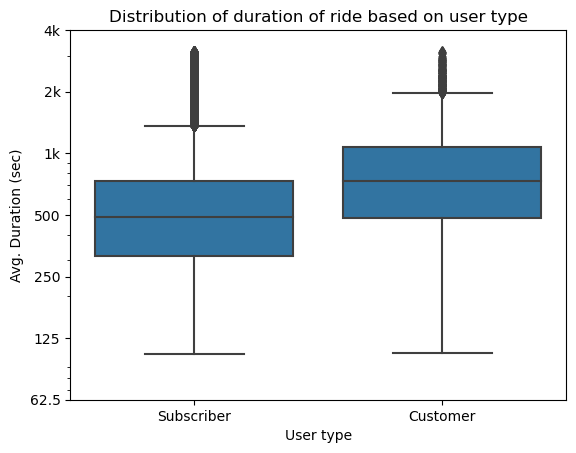

In [12]:
# Bivaraiate analysis of duration and user type
sb.boxplot(data = fordgobike_clean, x = 'user_type', y = 'duration_sec', color = default_color)
plt.yscale('log')
plt.yticks([62.5, 125, 250, 500, 1000, 2000, 4000], [62.5, 125, 250, 500, '1k', '2k', '4k'])
plt.ylabel('Avg. Duration (sec)')
plt.xlabel('User type')
plt.title('Distribution of duration of ride based on user type');

## Duration of ride (log) VS Distance covered (log) based on Gender and User type
> The positive correlation earlier established between duration of ride and distance covered was confirmed and the positive correlation remains irrespective of the gender of the rider or the type of users theya are as shown below

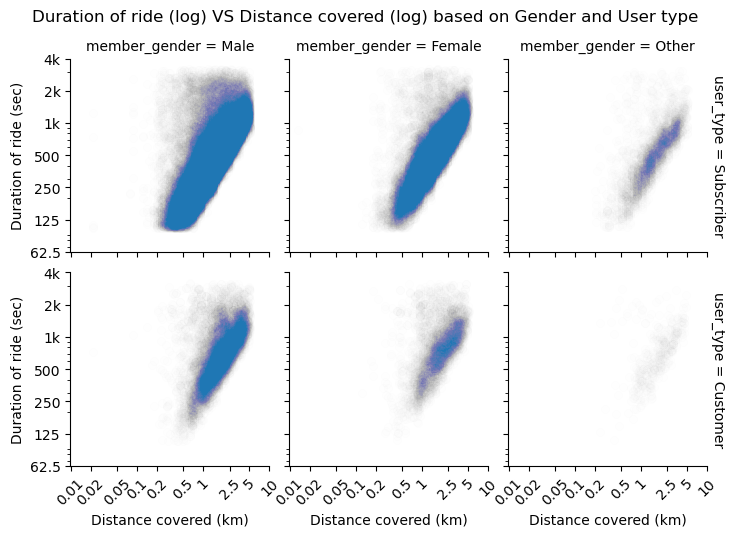

In [13]:
# Multivaraiate analysis of duration and distance by gender
plt.rcParams["figure.figsize"] = (11.69, 8.27)
g = sb.FacetGrid(data = fordgobike_clean, col = 'member_gender', row = 'user_type', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'distance', 'duration_sec', alpha = 0.005)
g.set_axis_labels( 'Distance covered (km)' , 'Duration of ride (sec)' )
g.fig.suptitle('Duration of ride (log) VS Distance covered (log) based on Gender and User type', y=1.03)
plt.yscale('log')
plt.xscale('log')
g.set(yticks = [62.5, 125, 250, 500, 1000, 2000, 4000] , yticklabels = [62.5, 125, 250, 500, '1k', '2k', '4k'])
g.set(xticks = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2.5, 5, 10] , xticklabels = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2.5, 5, 10])
g.set_xticklabels(rotation=45)

plt.show();

## Conclusion

> Investigation on the fordgobike dataset aimemd at assessing the influence of distanced covered by riders, age, gender and user type on the duration it takes for trips to be completed and the distance covered by the riders, gender and user type have some form of influence on the duration of ride as an increase in distance covered by riders lead to an in increase in duration of ride, similarly the male gender were seen to have completed each average trip faster followed by the other gender and lastly the female. Additionally, the riders who were subscribers also completed each trip faster and surprisingly age did not appear to have any significant influence on ride duration.

In [14]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

^C
